In [116]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from skimage import data, util, exposure, color

In [117]:
#Para comenzar vamos a mostrar las imágenes, para esto debemos coger el archivo de images y mostrarlo con la librería plot
#Como información extra voy a poner también el formato, tamaño y modo de la imagen.

#He creado esta función para mostrar la información de una determinada imagen y poder verla.
def mostrarInfyImg(file):
    img  = Image.open(file)

    #Información extra
    print('formato:', img.format)
    print('(ancho, alto) =', img.size)
    print('modo: ', img.mode)


    #Valores máximos, mínimos....
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    print('El valor máximo de la imagen: ', img_np.max())
    print('El valor mínimo de la imagen: ', img_np.min())
    print('Mímimo: ', img_np.min(), '\tMáximo: ', img_np.max(), '\tRango: ', img_np.max()-img_np.min())
    print('Media: ', img_np.mean(), '\tDesviación típica: ', img_np.std(), '\tVarianza: ', img_np.var(), 
          '\nCoeficiente de variación', img_np.std()/img_np.mean(), )


    img_q = np.quantile(img, (0.25, 0.5, 0.75))
    print('1er cuantil (Q1): ', img_q[0], '\tMediana (Q2): ', img_q[1], '\t3er cuantil (Q3): ', img_q[2],
         '\nRango intercuantil (IQR): ', img_q[2]-img_q[0], '\tRango medio intercuantil: ', (img_q[0]+img_q[2])/2,
         '\nBigote inferior (Q1 - 1.5 IQR): ', (img_q[0]*1.5)-(img_q[2]-img_q[0]),
         '\nBigote superior (Q3 + 1.5 IQR): ', (img_q[2]*1.5)+(img_q[2]-img_q[0]))


    plt.imshow(img, cmap='gray')# Aquí mostramos la imagen

def mostrarHistograma(file):
    img  = Image.open(file)
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    img_hist, bins = exposure.histogram(img_np, normalize=False)
    plt.plot(bins, img_hist)
    plt.axis([0,255, 0, 1.01*img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias absolutas')
    plt.grid()

def mostrarCajaBigote(file):
    img  = Image.open(file)
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    plt.boxplot(img_np.flatten(), vert=False)
    plt.xlim([-1, 256])
    plt.title('Diagrama de dispersión (caja y bigote)')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('imagen')
    plt.grid()
    
def mostrarfunDistribucionCumulativa(file):
    img  = Image.open(file)
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    img_cdf, bins_cdf = exposure.cumulative_distribution(img_np)
    plt.plot(bins_cdf, img_cdf)
    plt.axis([0,255, 0, 1])
    plt.title('Función de distribución cumulativa')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencia relativa acumulada')
    plt.grid()
    

formato: TIFF
(ancho, alto) = (482, 571)
modo:  L
El valor máximo de la imagen:  255
El valor mínimo de la imagen:  21
Mímimo:  21 	Máximo:  255 	Rango:  234
Media:  66.7182565347247 	Desviación típica:  46.500046005779 	Varianza:  2162.254278539563 
Coeficiente de variación 0.6969613479269684
1er cuantil (Q1):  30.0 	Mediana (Q2):  57.0 	3er cuantil (Q3):  82.0 
Rango intercuantil (IQR):  52.0 	Rango medio intercuantil:  56.0 
Bigote inferior (Q1 - 1.5 IQR):  -7.0 
Bigote superior (Q3 + 1.5 IQR):  175.0


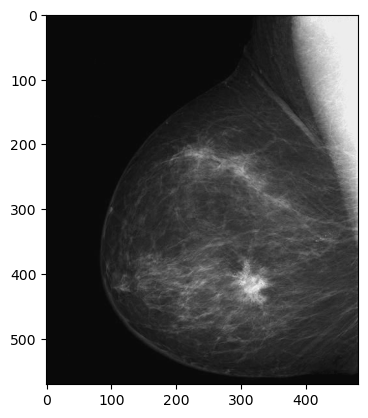

In [118]:
mostrarInfyImg('images/breastXray.tif') #Aquí podemos ver la imagen y toda la inofomación de la imagen de la mamografía.

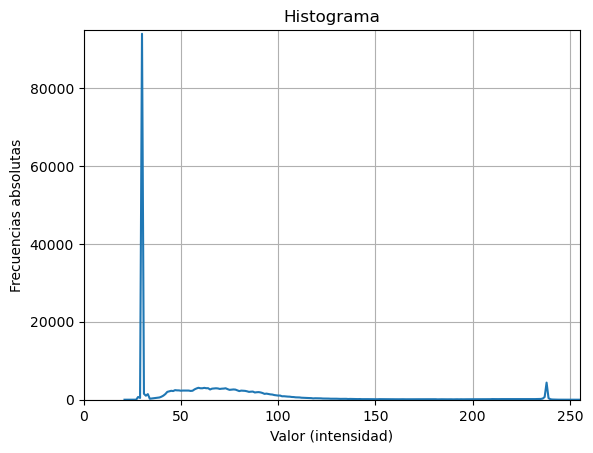

In [120]:
mostrarHistograma('images/breastXray.tif') 
#Ahora vamos a mostrar los histogramas, que son una de las cosas más importantes a tener en cuenta para el procesado de imágenes. 

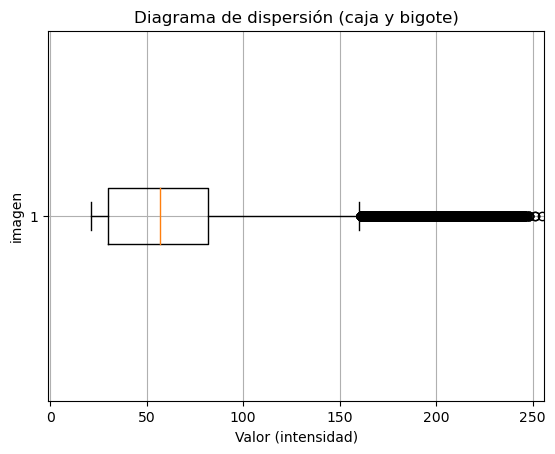

In [121]:
mostrarCajaBigote('images/breastXray.tif')
#Ahora, vamos a ver el diagrama de dipersión (caja y bigote)

#En el diagrama de caja y bigote, sabemos que el extremo inferior y superior de los bigotes se calcula restando y sumando 1.5IQR,
#respectivamente al primer y tercer cuartil. Esto muestra el límite de los valores atípicos (el valor 1.5 podría cambiarse dependiendo de los datos).

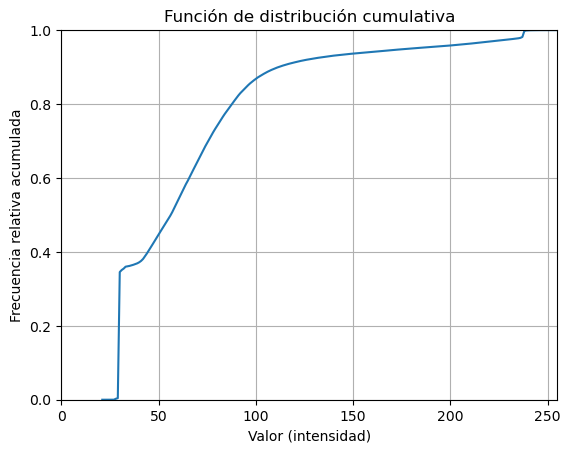

In [132]:
mostrarfunDistribucionCumulativa('images/breastXray.tif')

# La función de Distribución Cumulativa es la función que describe las frecuencias relativas acumuladas hasta un valor dado. Esta función está directamente relacionada con el histograma 
#(se obtiene acumulando las sucesivas frecuencias relativas), y aproxima la función de distribución de probabilidad de los valores obtenidos en la realización. 

#También para obtener la distribución a partir del histgrama debemos acumular los valores de éste y, al contrario, para obtener el histograma a partir de la distribución debemos de realizar diferecnias sucesivas.

formato: TIFF
(ancho, alto) = (500, 800)
modo:  L
El valor máximo de la imagen:  255
El valor mínimo de la imagen:  0
Mímimo:  0 	Máximo:  255 	Rango:  255
Media:  17.2210775 	Desviación típica:  29.338301113714703 	Varianza:  860.7359122389935 
Coeficiente de variación 1.7036274944883503
1er cuantil (Q1):  0.0 	Mediana (Q2):  4.0 	3er cuantil (Q3):  22.0 
Rango intercuantil (IQR):  22.0 	Rango medio intercuantil:  11.0 
Bigote inferior (Q1 - 1.5 IQR):  -22.0 
Bigote superior (Q3 + 1.5 IQR):  55.0


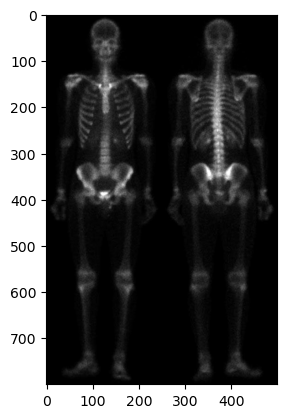

In [133]:
#AHORA TENEMOS QUE HACER LO MISMO CON TODAS LAS DEMÁS IMÁGENES. 
mostrarInfyImg('images/skeleton.tif')

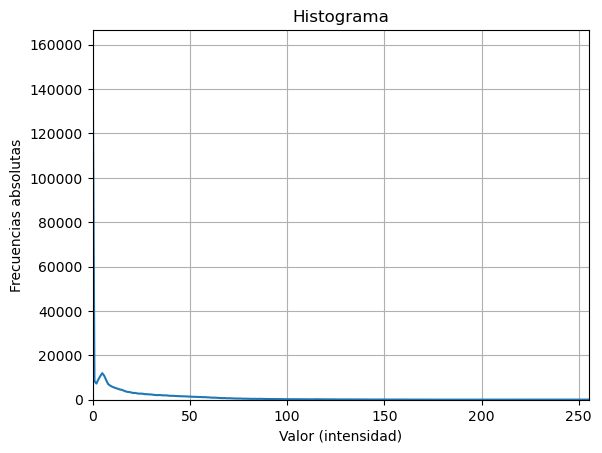

In [134]:
mostrarHistograma('images/skeleton.tif')

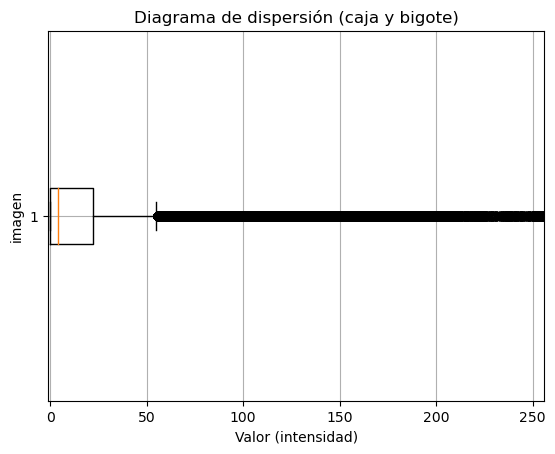

In [135]:
mostrarCajaBigote('images/skeleton.tif')



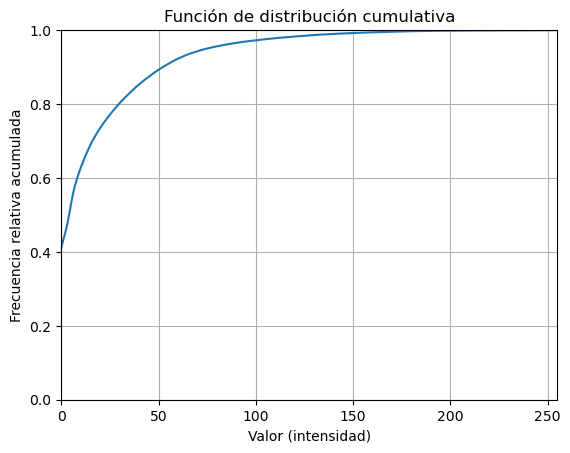

In [136]:
mostrarfunDistribucionCumulativa('images/skeleton.tif')

formato: TIFF
(ancho, alto) = (765, 769)
modo:  L
El valor máximo de la imagen:  255
El valor mínimo de la imagen:  0
Mímimo:  0 	Máximo:  255 	Rango:  255
Media:  197.1243155953322 	Desviación típica:  40.880559425295594 	Varianza:  1671.2201389251243 
Coeficiente de variación 0.20738466130793062
1er cuantil (Q1):  181.0 	Mediana (Q2):  208.0 	3er cuantil (Q3):  222.0 
Rango intercuantil (IQR):  41.0 	Rango medio intercuantil:  201.5 
Bigote inferior (Q1 - 1.5 IQR):  230.5 
Bigote superior (Q3 + 1.5 IQR):  374.0


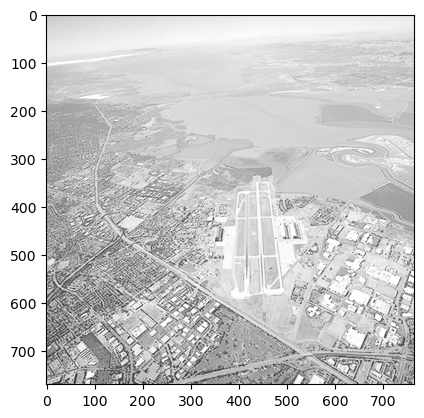

In [137]:
mostrarInfyImg('images/washed_aerial.tif')

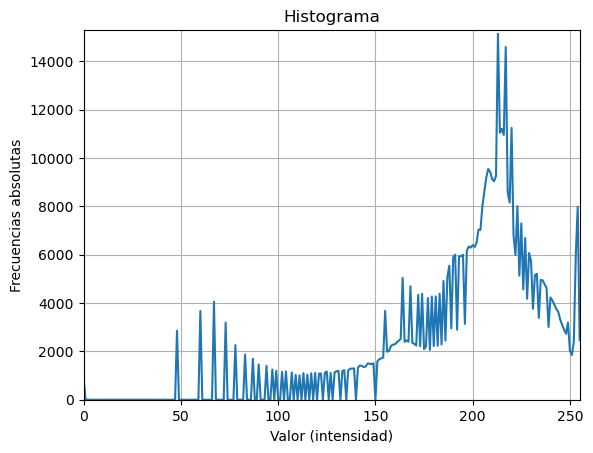

In [138]:
mostrarHistograma('images/washed_aerial.tif')

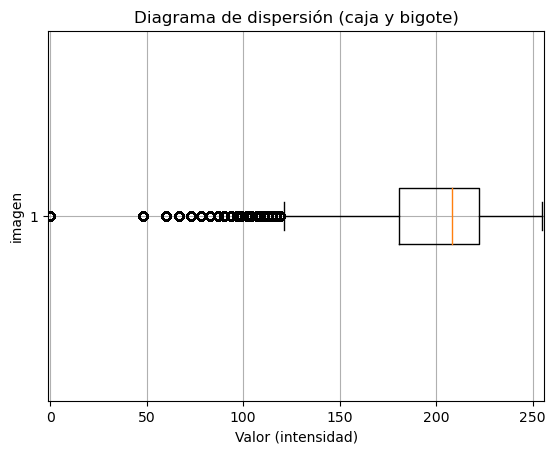

In [139]:
mostrarCajaBigote('images/washed_aerial.tif')

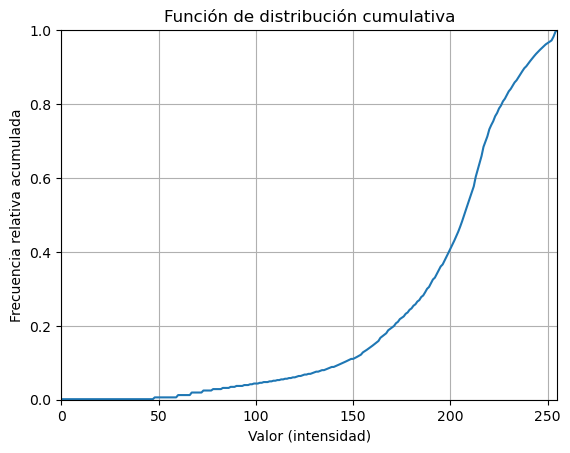

In [140]:
mostrarfunDistribucionCumulativa('images/washed_aerial.tif')

formato: TIFF
(ancho, alto) = (889, 889)
modo:  L
El valor máximo de la imagen:  138
El valor mínimo de la imagen:  91
Mímimo:  91 	Máximo:  138 	Rango:  47
Media:  109.08651168322744 	Desviación típica:  11.49156306034834 	Varianza:  132.05602156996252 
Coeficiente de variación 0.10534357440742348
1er cuantil (Q1):  98.0 	Mediana (Q2):  110.0 	3er cuantil (Q3):  118.0 
Rango intercuantil (IQR):  20.0 	Rango medio intercuantil:  108.0 
Bigote inferior (Q1 - 1.5 IQR):  127.0 
Bigote superior (Q3 + 1.5 IQR):  197.0


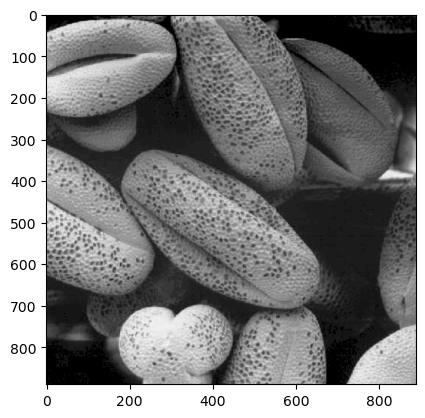

In [141]:
mostrarInfyImg('images/washed_pollen.tif')

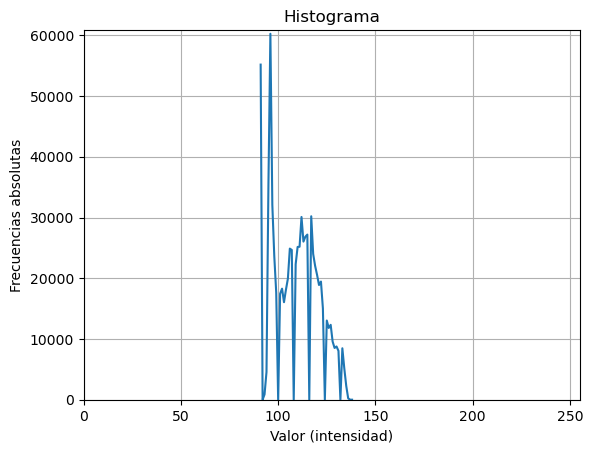

In [142]:
mostrarHistograma('images/washed_pollen.tif')

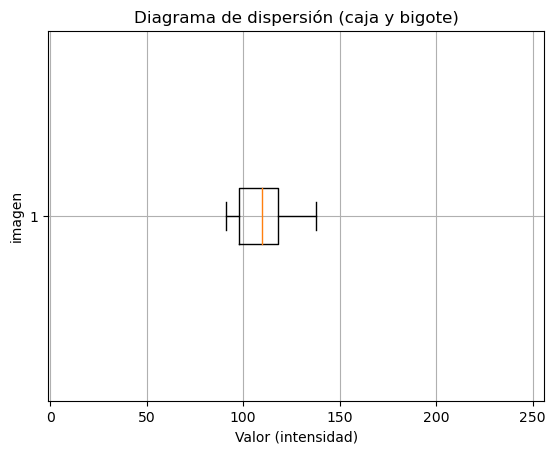

In [143]:
mostrarCajaBigote('images/washed_pollen.tif')

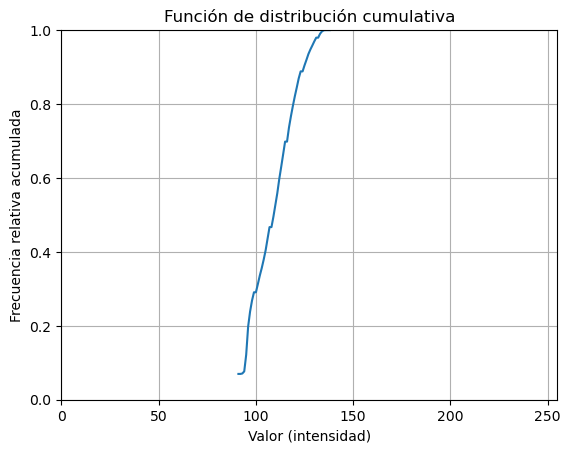

In [144]:
mostrarfunDistribucionCumulativa('images/washed_pollen.tif')

formato: JPEG
(ancho, alto) = (4032, 3024)
modo:  RGB


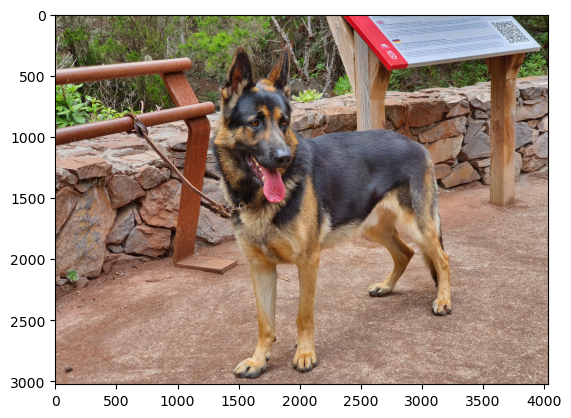

In [145]:
img_RGB = Image.open('images/PerroBoston.jpg')

print('formato:', img_RGB.format)
print('(ancho, alto) =', img_RGB.size)
print('modo: ', img_RGB.mode)


plt.imshow(img_RGB, cmap='gray')

#Cabe destacar que esta imagen es a color, se puede ver fácilmente cuando mostramos el modo (RGB).

Cuando tenemos imágenes en color trabajamos por separado con sus canales componentes. Por ejemplo, podemos trabajar directamente sobre los canales RGB (rojo, verde y azul) o, alternativamente, por ejemplo, hacerlo sobre los canales HSV (tinte, saturación y valor).

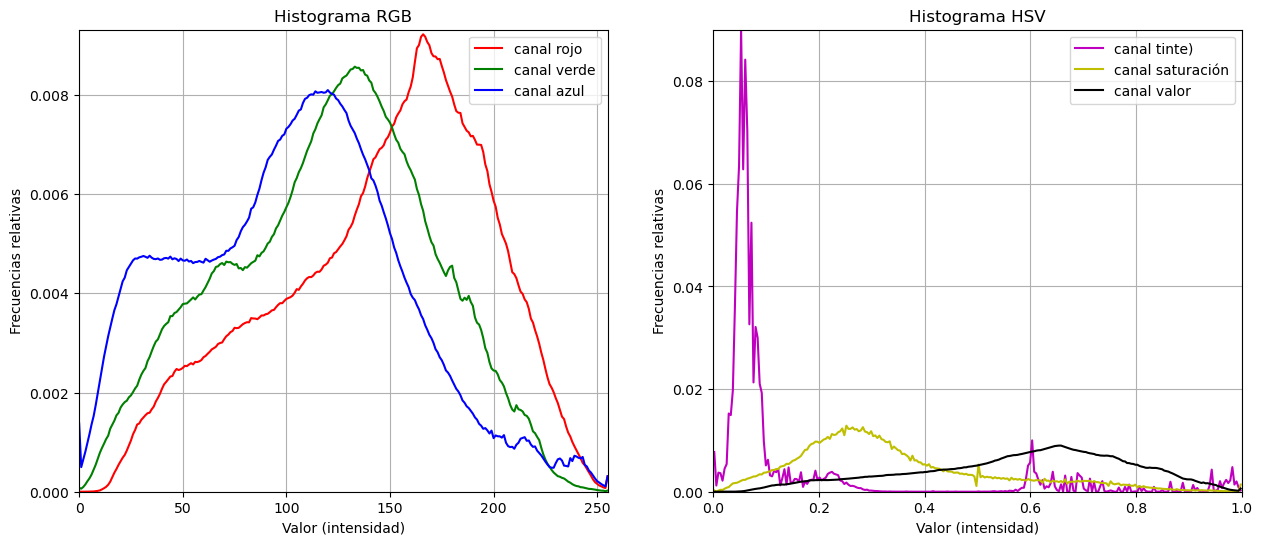

In [146]:
#Ahora vamos a ver el análisis de la imagen en color
#No podemos usar las funciones que hemos usado para las otras imágenes, ya que en esta los histogramas serán bastantes diferentes ya que tenemos 3 canales.
imgRGB_np = np.array(img_RGB)
img_hist, bins = exposure.histogram(imgRGB_np, channel_axis=2, normalize=True)
M = img_hist.max()

plt.figure(figsize=(15, 6)) #Ajustamos para poder ver 2 diagramas a al vez.

#Vamos a mostrar el histograma para el canal RGB
plt.subplot(121)
plt.plot(bins, img_hist[0,:],'r', label='canal rojo')
plt.plot(bins, img_hist[1,:],'g', label='canal verde')
plt.plot(bins, img_hist[2,:],'b', label='canal azul')

plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.legend()
plt.title('Histograma RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

#Ahora vamos a ver el histograma en HSV, para ello debemos convertirla primero.

plt.subplot(122)
img_hsv = color.rgb2hsv(imgRGB_np)

img_hist, bins = exposure.histogram(img_hsv, channel_axis=2, normalize=True)

plt.plot(bins, img_hist[0,:],'m', label='canal tinte)')
plt.plot(bins, img_hist[1,:],'y', label='canal saturación')
plt.plot(bins, img_hist[2,:],'k', label='canal valor')

plt.axis([0,1, 0, img_hist.max()])
plt.legend()
plt.title('Histograma HSV')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()



Para trabarjar en el espacio HSV debemos realizar algunas modificaciones. La imagen en el espacio HSV no se puede representar directamente (hay que convertirla a RGB) y está en punto flotante, en el rango 0 a 1. Los valores HSV varían del siguiente modo:

- Hue (tinte o color): varía de 0 a 360º, pero se normaliza de 0 a 1. 0ª y 360ª (ó 0) es rojo, 120º (o 1/3) es verde y 240ª (2/3) es azul
- Saturation (saturación): 0 no está saturado (blanco o gris, sin color) y 1 completamente saturado (color puro)
- Value (valor o intensidad percibida -luma-): 0 es mínima luma y 1 es máxima

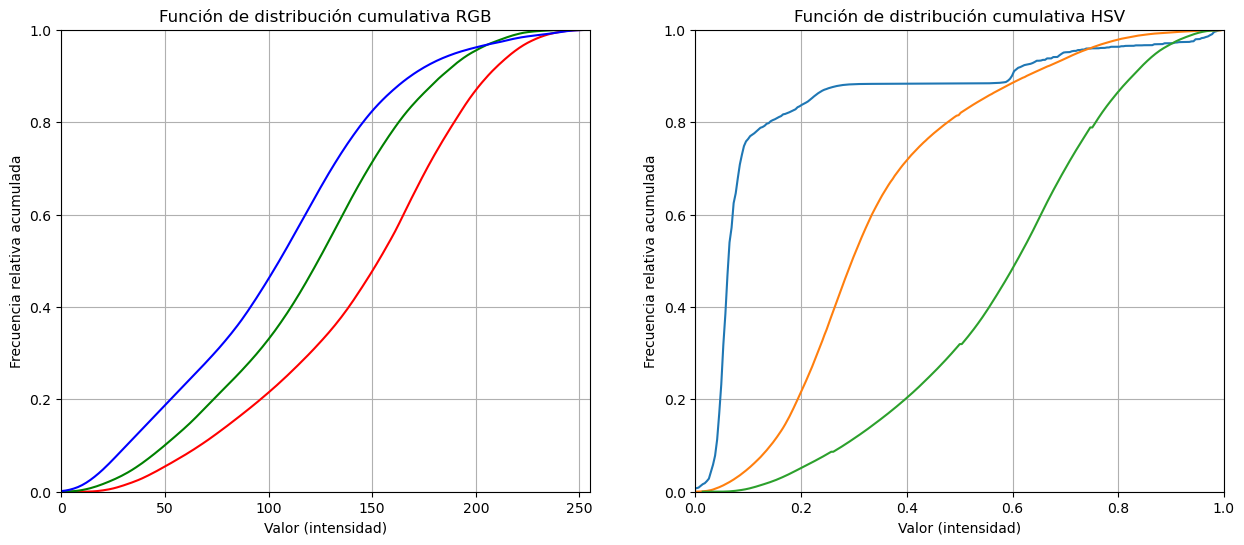

In [147]:
#Ahora vamos a ver la función de distribución cumulativa de RGB
plt.figure(figsize=(15, 6)) #Ajustamos para poder ver 3 diagramas a al vez

img_cdfR, bins_cdfR = exposure.cumulative_distribution(imgRGB_np[:,:,0])
img_cdfG, bins_cdfG = exposure.cumulative_distribution(imgRGB_np[:,:,1])
img_cdfB, bins_cdfB = exposure.cumulative_distribution(imgRGB_np[:,:,2])

plt.subplot(121)
plt.plot(bins_cdfR, img_cdfR, "r")
plt.plot(bins_cdfG, img_cdfG, "g")
plt.plot(bins_cdfB, img_cdfB, "b")
plt.axis([0,255, 0, 1])
plt.title('Función de distribución cumulativa RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencia relativa acumulada')
plt.grid()

#Ahora vamos a ver la función de distribución cumulativa de HSV

img_cdfH, bins_cdfH = exposure.cumulative_distribution(img_hsv[:,:,0])
img_cdfS, bins_cdfS = exposure.cumulative_distribution(img_hsv[:,:,1])
img_cdfV, bins_cdfV = exposure.cumulative_distribution(img_hsv[:,:,2])

plt.subplot(122)
plt.plot(bins_cdfH, img_cdfH)
plt.plot(bins_cdfS, img_cdfS)
plt.plot(bins_cdfV, img_cdfV)
plt.axis([0,1, 0, 1])
plt.title('Función de distribución cumulativa HSV')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencia relativa acumulada')
plt.grid()



# A partir de aquí vamos a comenzar con el apartado 3 de la Práctica:

Para realizar la transformación debemos tener en cuenta que: 𝑦=0  fija el nivel de negro ( 𝐵𝐿 ), mientras que  𝑦=𝑀𝑖  (máximo valor posible, por ejemplo, 255) fija el nivel de blanco ( 𝑊𝐿 ) de los píxeles de entrada. Si  𝑥<0  se fija 0 y si  𝑥>𝑀𝑖  se fijan 0 y  𝑀𝑖  para los niveles de negro y blanco, respectivamente.

In [148]:

#Vamos a definir la función para realizar la transformación 
def transformacion (file, Mi, Bl, Wl):
    img = Image.open(file)


    L = (Bl + Wl)/2
    W = Wl - Bl

    m = Mi/W
    b = -Mi*(L/W - 0.5)

    print('Nivel (L): ', L, '\tVentana (W): ', W)
    print('Nivel de negro: ', Bl, '\tNivel de Blanco: ', Wl)
    print('m = ', m, 'b = ', b)
    
    
    img_float = util.img_as_float(img)*Mi

    img_float = img_float*m + b
    img_float[img_float<0]  = 0
    img_float[img_float>Mi] = Mi

    img_transf = util.img_as_ubyte(img_float/Mi)

    print('Tipo de datos: ', img_transf.dtype)
    print('Tamaño de imagen (filas, columnas): ', img_transf.shape)
    print('Número de píxels: ', img_transf.size)
    print('Imagen: \nValor mínimo: ', img_transf.min(), '\tValor máximo: ', img_transf.max())
    print('Valor mediano: ', img_transf.mean())
        
    
    
    plt.figure(figsize=(15, 6))
    
    
    img_hist, bins = exposure.histogram(img_transf, normalize=True)

    plt.subplot(121)
    plt.imshow(img_transf, cmap='gray')
    plt.title('Imagen transformada')

    plt.subplot(122)
    plt.plot(bins, img_hist)
    plt.axis([0,255, 0, img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias relativas')
    plt.grid()

    plt.tight_layout()

Hemos utilizado la función de **scikit-image.util** para hacer la conversión, por lo que tendremos que tener en cuenta el reescalado.

Nivel (L):  94.5 	Ventana (W):  69
Nivel de negro:  60 	Nivel de Blanco:  129
m =  3.6956521739130435 b =  -221.73913043478262
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (571, 482)
Número de píxels:  275222
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  51.41865112527341


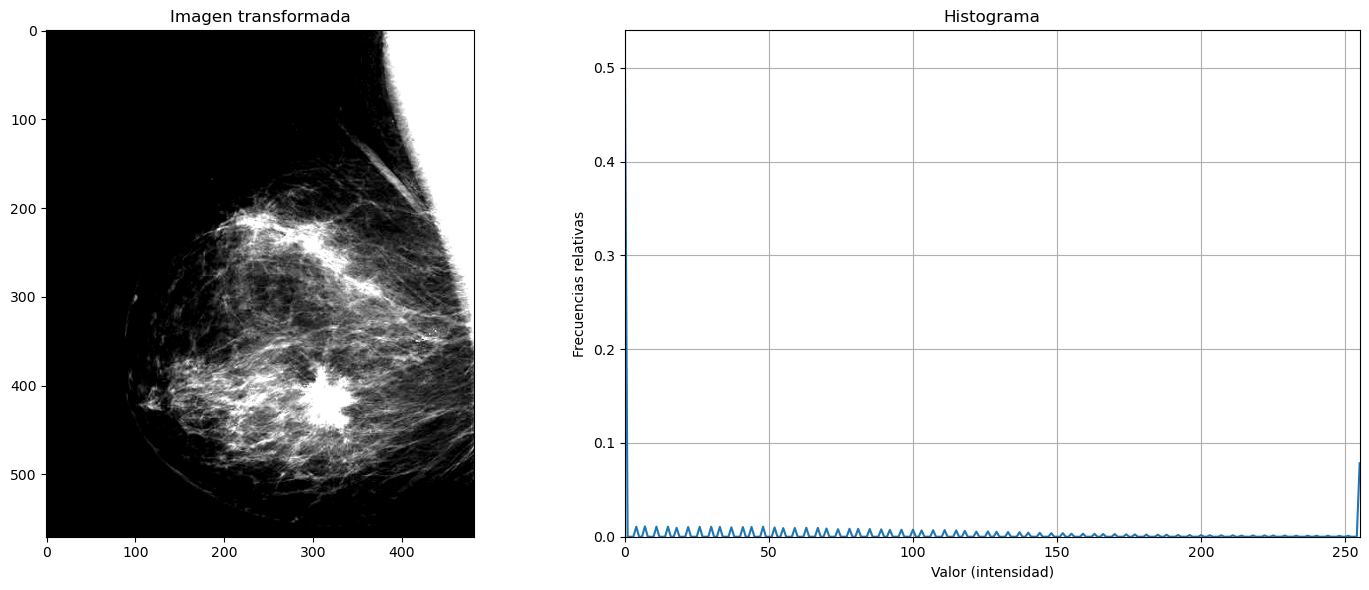

In [149]:
#Vamos a comenzar con la primera imagen, usando la función que hemos definido anteriormente donde por parámetros metemos:
# (file, Mi, Bl, Wl)

#En esta imagen vamos a intentar quedarnos con la parte interior de la radiografía y quitar la capa exterior (vamos a intentar quitar esa especie de "telilla")
transformacion('images/breastXray.tif', 255, 60, 129)

Nivel (L):  74.5 	Ventana (W):  109
Nivel de negro:  20 	Nivel de Blanco:  129
m =  2.3394495412844036 b =  -46.788990825688074
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (800, 500)
Número de píxels:  400000
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  20.4210925


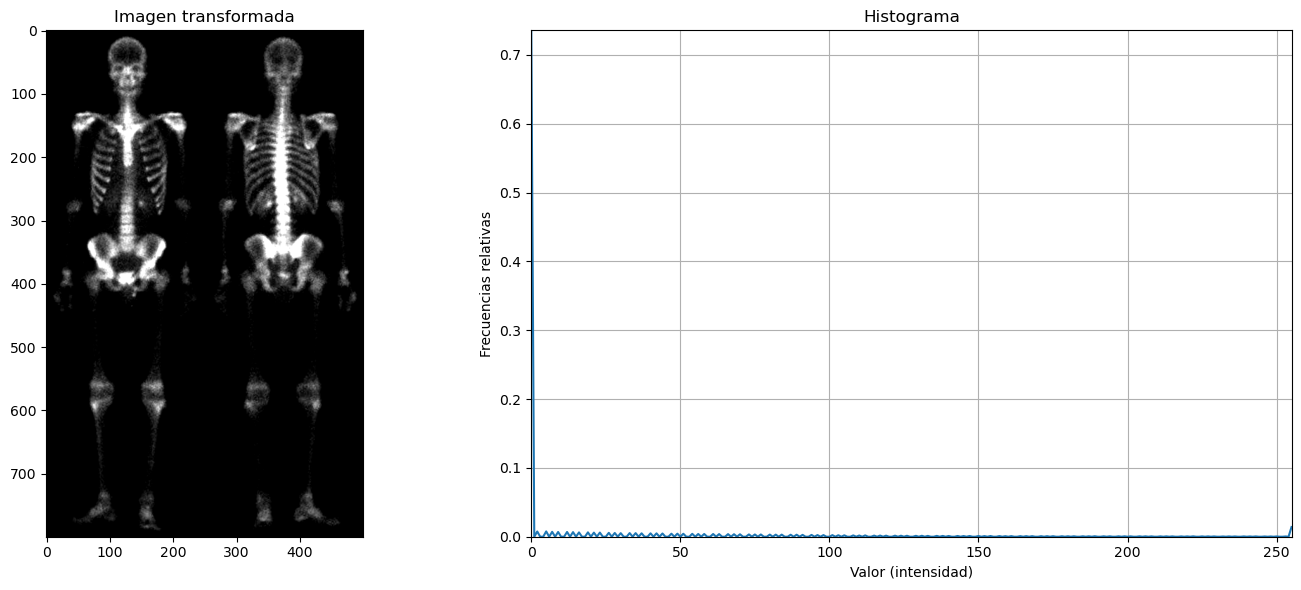

In [150]:
transformacion('images/skeleton.tif', 255, 20, 129)
#En esta imagen vamos a intentar que s e vea mejor el esqueleto humano.

Nivel (L):  175.0 	Ventana (W):  50
Nivel de negro:  150 	Nivel de Blanco:  200
m =  4.0 b =  -600.0
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (769, 765)
Número de píxels:  588285
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  75.5909805621425


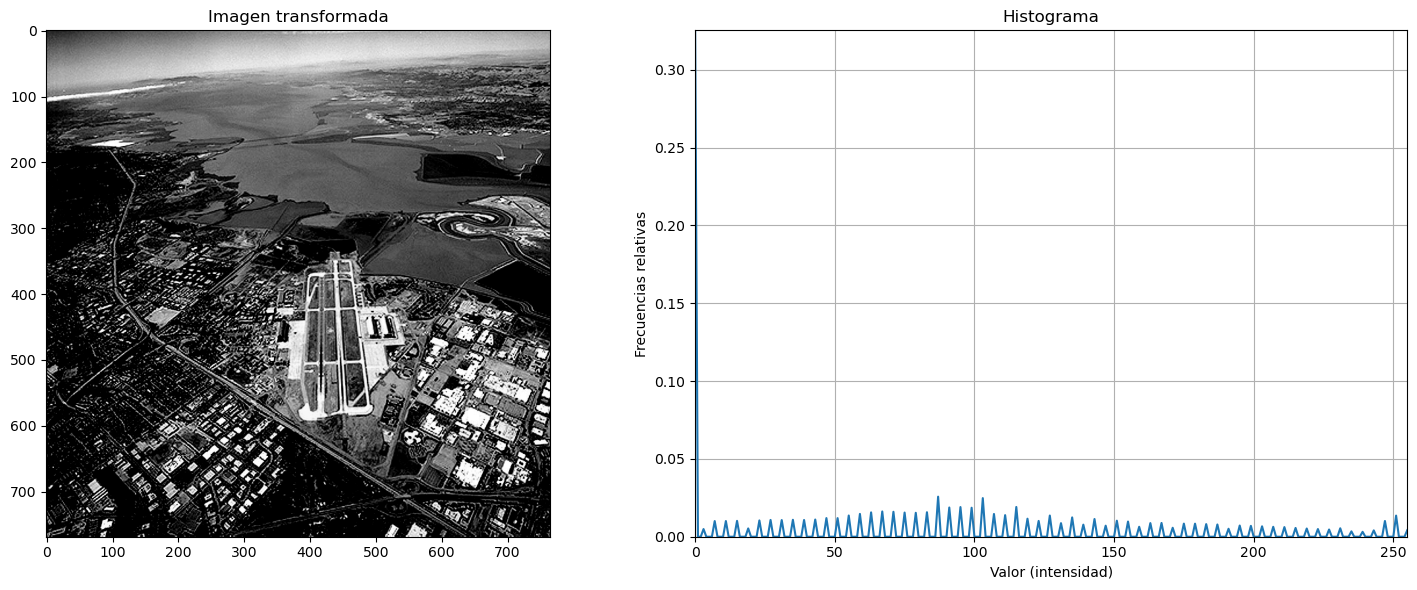

In [151]:
transformacion('images/washed_aerial.tif', 200, 150, 200) 
#En este imagen vamos a intentar quitar la niebla e intentar verla más oscura para verla mejor

Nivel (L):  177.5 	Ventana (W):  -155
Nivel de negro:  255 	Nivel de Blanco:  100
m =  -1.6451612903225807 b =  419.5161290322581
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (889, 889)
Número de píxels:  790321
Imagen: 
Valor mínimo:  192 	Valor máximo:  255
Valor mediano:  237.7115121577182


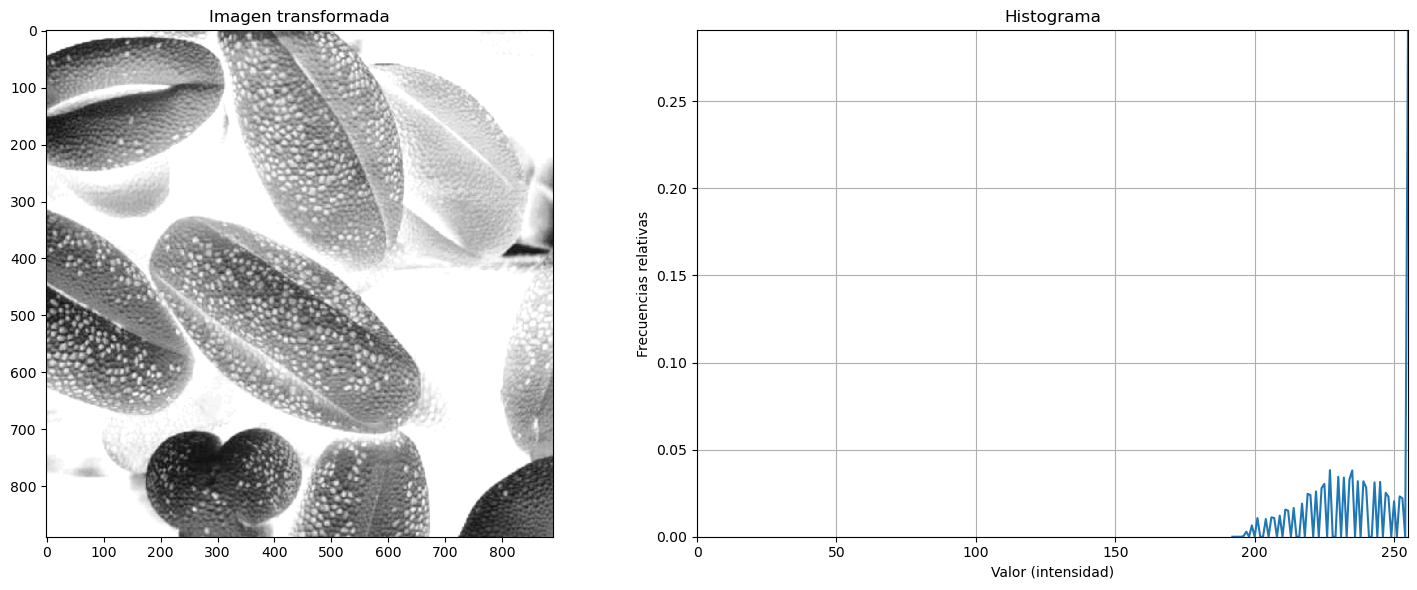

In [152]:
transformacion('images/washed_pollen.tif', 255, 255, 100)
#En esta imagen vamos a intentar quedarnos con las "cápsulas" del polen

# A partir de aquí vamos a comenzar con el apartado 4 de la Práctica:

In [153]:
#Primero, vamos a realizar una función para la transformación negativa y después podremos aplicar esta función a las imágenes

def transformacionNegativa (file):
    img  = Image.open(file)
    img_np = np.array(img) 
    img_inv = util.invert(img_np)
    print('Tipo de datos: ', img_np.dtype)
    print('Tamaño de imagen (filas, columnas): ', img_np.shape)
    print('Númro de píxels: ', img_np.size)
    print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
    print('Imagen inversa: \nValor mínimo: ', img_inv.min(), '\tValor máximo: ', img_inv.max())

    img_hist, bins = exposure.histogram(img_np, normalize=True)
    img_inv_hist, bins = exposure.histogram(img_inv, normalize=True)

    plt.figure(figsize=(8, 8))

    plt.subplot(221)
    plt.imshow(img_np, cmap='gray')

    plt.subplot(222)
    plt.plot(bins, img_hist)
    plt.axis([0,255, 0, 1.01*img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias relativas')
    plt.grid()

    plt.subplot(223)
    plt.imshow(img_inv, cmap='gray')

    plt.subplot(224)
    plt.plot(bins, img_inv_hist)
    plt.axis([0,255, 0, 1.01*img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias relativas')
    plt.grid()

    plt.tight_layout()

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (571, 482)
Númro de píxels:  275222
Imagen: 
Valor mínimo:  21 	Valor máximo:  255
Imagen inversa: 
Valor mínimo:  0 	Valor máximo:  234


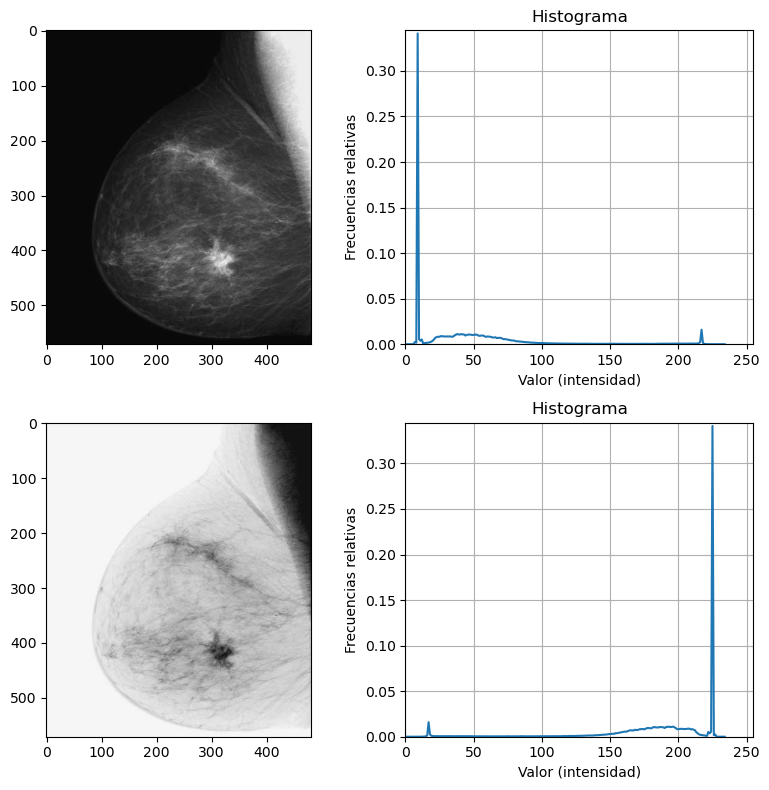

In [154]:
transformacionNegativa('images/breastXray.tif')
#Aplicamos esta transformación y como era de esperar podemos ver que las zonas más oscuras se han convertido en las zonas más claras y viceversa.
#El resultado conseguido es muy bueno porque podemos ver perfectamente lo que hay en el interior de la "telilla".
#Mostrando el histograma se puede ver perfectamente como ha cambiado el pico del inicio (tonos  más oscuros cercanos al 0), al final (tonos más claros).

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (800, 500)
Númro de píxels:  400000
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Imagen inversa: 
Valor mínimo:  0 	Valor máximo:  255


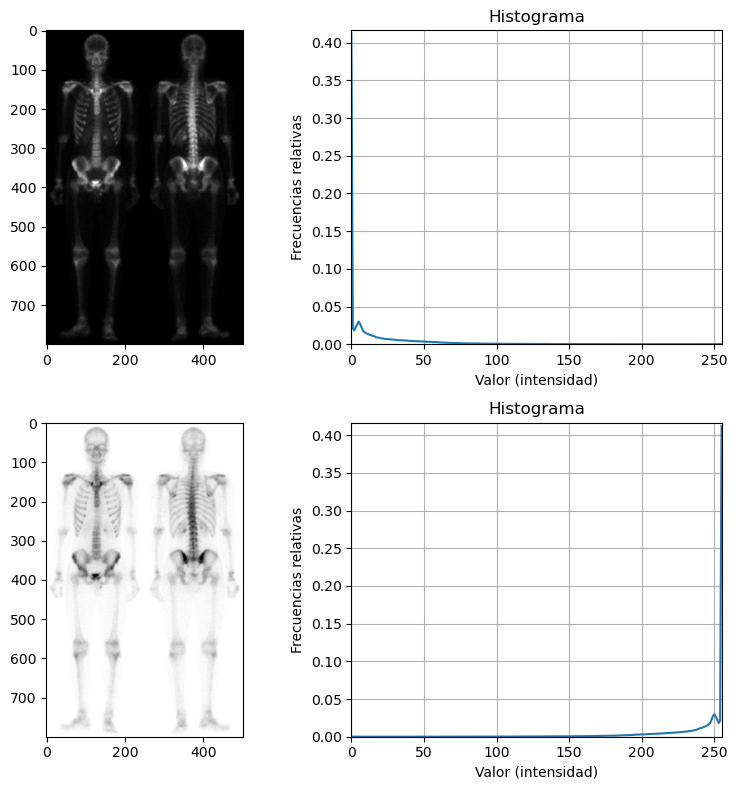

In [155]:
transformacionNegativa('images/skeleton.tif') 
#Aquí, podemos volver a ver como se aprecian mejor los huesos del esqueleto del cuerpo humano.
#En mi opinión, donde mejor se puede ver es en el fémur, ya que con el fondo negro casi no se aprecia, mientras que en blanco si. 

# Apartado 5:

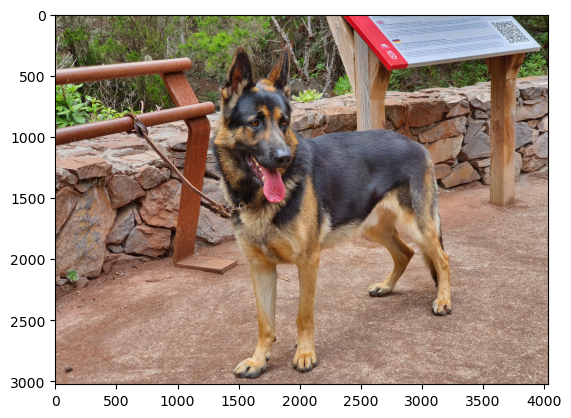

In [156]:
#Vamos a trabajar sobre el canal de luminancia, pero como podemos ver en el histograma que hemos mostrado anteriormente está muy bine repartido.
#Entonces viendo el mencionado histograma vamos a coger entre 0.2 y 0.9 que es dónde más área podemos ver. 

img_hsv2 = img_hsv.copy()


img_hsv2[:, :,2] > 0,2
img_hsv2[:, :,2] < 0,9

img_RGB2 = color.hsv2rgb(img_hsv2)

plt.imshow(img_RGB2);

# Apartado 6:

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (889, 889)
Número de píxels:  790321
Imagen: 
Valor mínimo:  91 	Valor máximo:  138
Valor mediano:  109.08651168322744


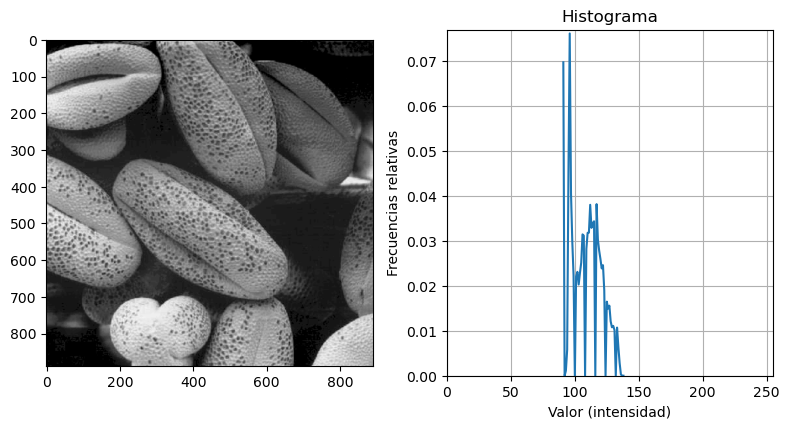

In [157]:
#Para comenzar vamos a mostrar de nuevo la imagen y el histograma para poder ver mejor los valores.

img  = Image.open('images/washed_pollen.tif')
img_np = np.array(img) 

print('Tipo de datos: ', img_np.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np.shape)
print('Número de píxels: ', img_np.size)
print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
print('Valor mediano: ', img_np.mean())

img_hist, bins = exposure.histogram(img_np, normalize=True)

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()



In [158]:
#Ene este primer caso vamos a usar la segmentación de umbral
# Con esta segmentacón podemos separar áreas de la imagen simplemente estableciendo umbrales en la intensidad para la pertenencia a cada categoría de objetos presentes en la imagen.

#En este caso vamos a intentar resaltar los "puntitos" de la imagen del polen

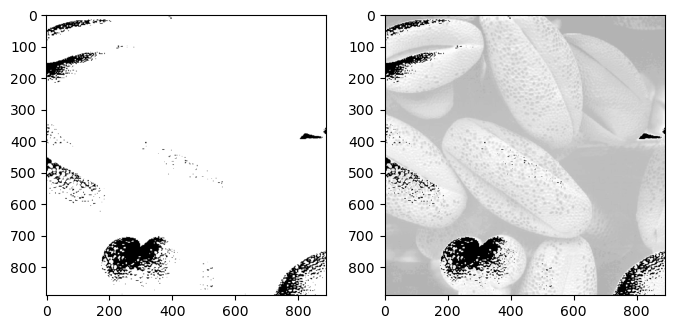

In [159]:
th_0, th_1 = 80, 130

mask = np.logical_and(img_np > th_0, img_np < th_1)

img_seg = img_np*mask

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(mask, cmap='gray')

plt.subplot(222)
plt.imshow(img_seg, cmap='gray')

Vamos a realizar otra máscara para otra imagen: 

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (800, 500)
Número de píxels:  400000
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  17.2210775


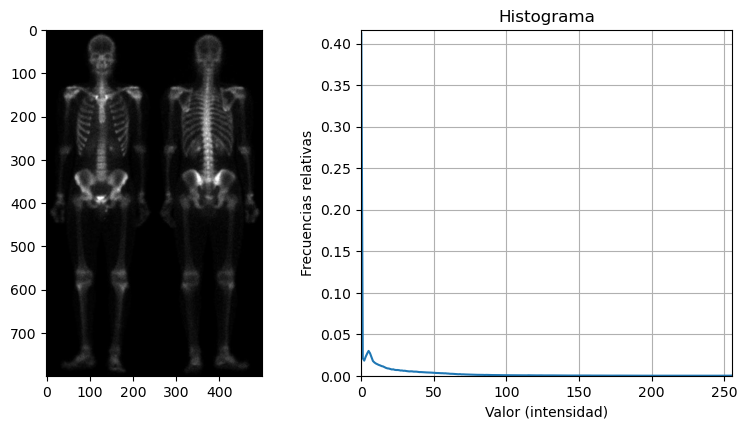

In [160]:
#Como antes, volvemos a mostrar la imagen original y el histograma (además de sus datos):

img  = Image.open('images/skeleton.tif')
img_np = np.array(img, dtype = 'uint8') #Lo convertimos a numPy y mantenemos 8 bits por pixel de enteros, si fueramos a trabajar con cálculos pasaríamos a flotante.
type(img_np) #Aquí ya vemos que es una imagen numpy


print('Tipo de datos: ', img_np.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np.shape)
print('Número de píxels: ', img_np.size)
print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
print('Valor mediano: ', img_np.mean())

img_hist, bins = exposure.histogram(img_np, normalize=True)

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()

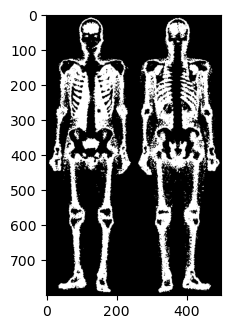

In [161]:
#Ahora, vamos a intentar quedarnos con el esqueleto, pero viendolo mucho mejor que en esa imagen

th_0, th_1 = 10, 50

mask = np.logical_and(img_np > th_0, img_np < th_1)

img_seg = img_np*mask

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(mask, cmap='gray')

In [162]:
#Como podemos ver, ahora los huesos están mucho más marcados, sobre todo en la parte del fémur y podemos diferenciarlos mucho mejor.
#Aunque ahora la parte de las costillas, cadera y espalda la vemos en negro. 


# Apartado 7:

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (800, 500)
Número de píxels:  400000
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  17.2210775


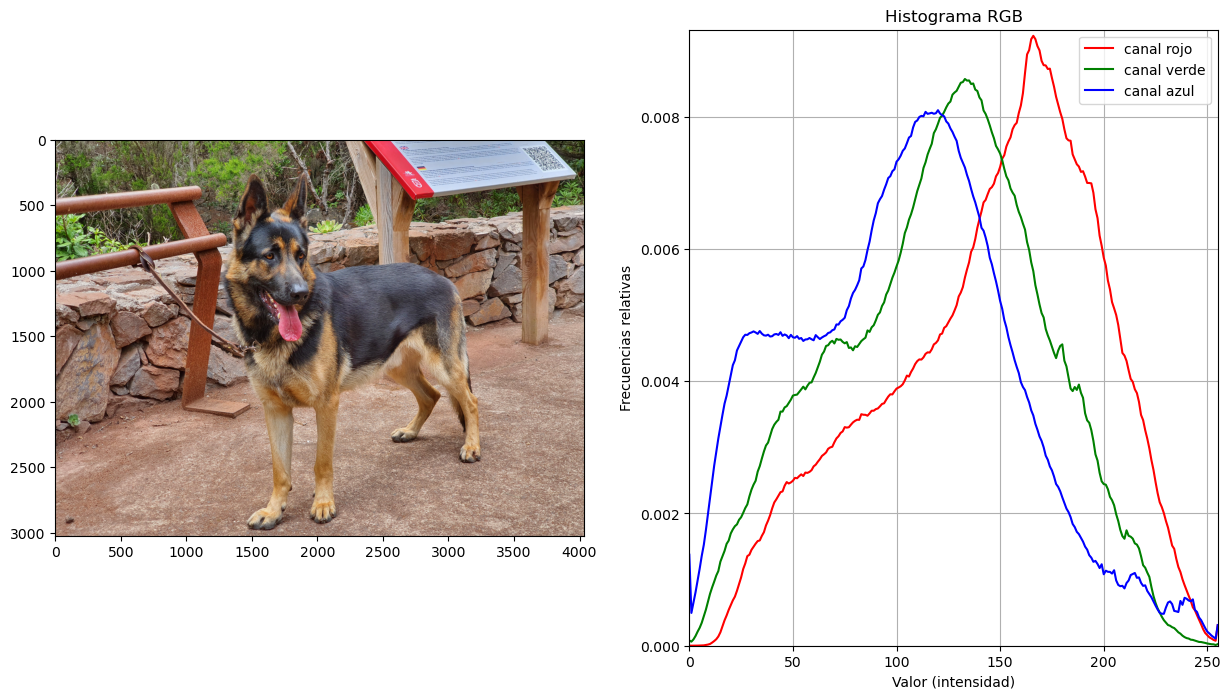

In [163]:
#Primero, vamos a mostrar la imagen RGB para poder ver al imagen incial sobre la que vamos a trabajar

img  = Image.open('images/PerroBoston.jpg')
imgRGB_np = np.array(img, dtype = 'uint8') #Lo convertimos a numPy y mantenemos 8 bits por pixel de enteros, si fueramos a trabajar con cálculos pasaríamos a flotante.
type(img_np) #Aquí ya vemos que es una imagen numpy


print('Tipo de datos: ', img_np.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np.shape)
print('Número de píxels: ', img_np.size)
print('Imagen: \nValor mínimo: ', img_np.min(), '\tValor máximo: ', img_np.max())
print('Valor mediano: ', img_np.mean())

img_hist, bins = exposure.histogram(imgRGB_np, channel_axis=2, normalize=True)
M = img_hist.max()

plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.plot(bins, img_hist[0,:],'r', label='canal rojo')
plt.plot(bins, img_hist[1,:],'g', label='canal verde')
plt.plot(bins, img_hist[2,:],'b', label='canal azul')

plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.legend()
plt.title('Histograma RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()


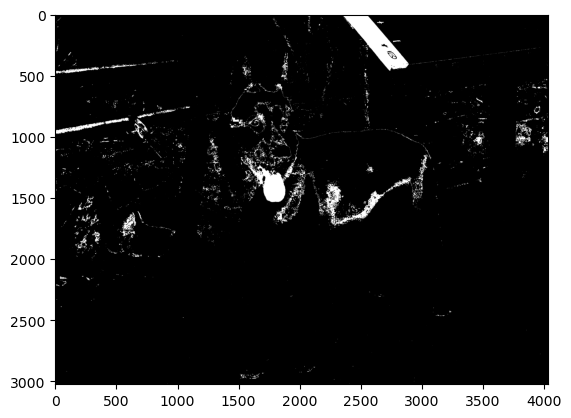

In [164]:
mask= np.logical_and (img_hsv[:,:,0] > 0.9, img_hsv[:,:,0] <1)

plt.imshow(mask, cmap='gray')

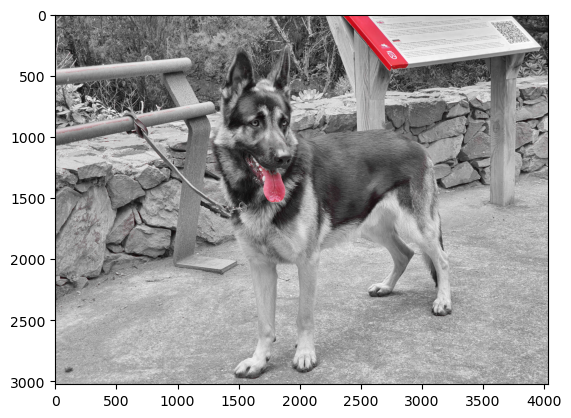

In [165]:
img_hsv2 = img_hsv.copy()

img_hsv2[np.logical_not(mask),1] = 0

img_RGB2 = color.hsv2rgb(img_hsv2)

plt.imshow(img_RGB2);

En esta imagen lo que queria conseguir era realzar la lengua del perro. Para ello, hemos aplicado una máscara en HSV y, después, para poder verla la hemos invertido. Así podemos ver este increíble resultado (aunque nos queda una parte del mural trasero, ya que también es rojo).